# Parte 2 - Experimentção

> Autor: Jonatas Travessa Souza de Barros - 1935310001

> Autor: Fabrizio Honda - 1715280006

## Importação das bibliotecas

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import os

## Leitura do arquivo data0.txt com numpy

In [2]:
data0 = np.fromfile('../dados/data0.txt')
print(data0)

[-0.00149369 -0.03581784  0.         ...  1.02021556  0.86533059
  1.        ]


### Vendo o formato inicial do array

In [3]:
data0.shape

(1800,)

#### Sendo 1800 valores, significa que há 600 exemplos, visto que cada exemplo é representado por (x1, x2, yd). Logo, vamos transformar o array para representar os exemplos.

In [4]:
data0 = data0.reshape(600, 3)
print(data0)

[[-0.00149369 -0.03581784  0.        ]
 [ 0.01234945  0.10249524  0.        ]
 [ 0.13954598  0.05607083  0.        ]
 ...
 [ 0.95751872  1.0035204   1.        ]
 [ 0.97981588  1.00949493  1.        ]
 [ 1.02021556  0.86533059  1.        ]]


## Algoritmo de treinamento do Perceptron

#### A implementação do algoritmo de treinamento do Perceptron usado para resolver a parte 1 está na pasta src cujo aqruivo python foi chamado de Peceptron_general.py. Sendo, portanto, o mesmo algoritmo usado na parte 1.

In [5]:
import sys
sys.path.append('../')
from src.Perceptron_general import Perceptron_general
from src.Perceptron import Perceptron

## Execução das configurações


### Cada configuração é executada 100 vezes

In [6]:
executions_number = 100 

### Configuração 1.
    Valor da taxa de aprendizado: 0.4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-100, +100).

In [8]:
# inicializando os paramentos do perceptron com a taxa de aprendizagem e os pesos
learning_rate = 0.4
weights = (-100.0, 100.0) #(min, max)

epochs, adjustments = np.array([]), np.array([])

# 100 interações do mesmo algoritmo
for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    #instanciando um perceptron
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    # data0[:,[0,1]] -> variaveis dependentes (x_train), data0[:,2] -> target (y_train)
    x_train = data0[:,[1,2]]
    y_train = data0[:,2]
    # treinando o perceptron e retornando o numero de epocas
    # o de ajustes
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    # salvando a quantidade de epocas usadas no treinamento
    # e quantidade de ajustes nos pesos
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

config1_epochs_mean = np.round(np.mean(epochs), 4)
config1_epochs_sd = np.round(np.std(epochs), 4)
config1_adjusts_mean = np.round(np.mean(adjustments), 4)
config1_adjusts_sd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", config1_epochs_mean, " Desvio Padrão: ", config1_epochs_sd)
print("Ajustes. Média: ", config1_adjusts_mean, " Desvio Padrão: ", config1_adjusts_sd)


	Iteração número  1

Quantidade total de épocas: 6
Quantidade total de ajustes: 157
Vetor final de pesos: [ 22.30216164  64.3955555  -23.73239629]

	Iteração número  2

Quantidade total de épocas: 11
Quantidade total de ajustes: 589
Vetor final de pesos: [ 6.21634899 20.94662376 -8.78097945]

	Iteração número  3

Quantidade total de épocas: 12
Quantidade total de ajustes: 519
Vetor final de pesos: [  7.97010084  26.9175811  -10.96753613]

	Iteração número  4

Quantidade total de épocas: 11
Quantidade total de ajustes: 130
Vetor final de pesos: [21.81143079 75.0351435  63.22518663]

	Iteração número  5

Quantidade total de épocas: 12
Quantidade total de ajustes: 32
Vetor final de pesos: [25.95114921 89.59276677 49.57011215]

	Iteração número  6

Quantidade total de épocas: 4
Quantidade total de ajustes: 190
Vetor final de pesos: [  5.75724628 -20.68619696  45.59984698]

	Iteração número  7

Quantidade total de épocas: 5
Quantidade total de ajustes: 169
Vetor final de pesos: [ 2.5201049

#### Inicialização do Perceptron

In [7]:
theta = 0.0
n = 0.4
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### Execuções

In [8]:
adjusts_array = np.empty(executions_number, dtype=int)
epochs_array = np.empty(executions_number, dtype=int)

i = 1
while (i <= executions_number):

    print("Iteração número ", i)
    print("")
    
    weights = perceptron.inittial_weights(-100.0, 100.0)
    perceptron.fit2(data0)
    adjusts_array[i - 1] = perceptron.getWeightsAdjusts()
    epochs_array[i - 1] = perceptron.getEpochs()
    print("Quantidade de ajustes: ", adjusts_array[i - 1])
    print("Quantidade de épocas: ", epochs_array[i - 1])
    
    #Garantir que na última interação teremos o vetor de pesos para posterior plotagem do gráfico
    if (i < 100):
        #Função que possibila reutilizar a classe sem precisar instaciar um novo objeto
        perceptron.reset()
    
    i+=1

config1_epochs_mean = np.round(np.mean(epochs_array), 4)
config1_epochs_sd = np.round(np.std(epochs_array), 4)
config1_adjusts_mean = np.round(np.mean(adjusts_array), 4)
config1_adjusts_sd = np.round(np.std(adjusts_array), 4)

print("")
print("Épocas. Média: ", config1_epochs_mean, " Desvio Padrão: ", config1_epochs_sd)
print("Ajustes. Média: ", config1_adjusts_mean, " Desvio Padrão: ", config1_adjusts_sd)


Iteração número  1

Quantidade de ajustes:  411
Quantidade de épocas:  17

Iteração número  2

Quantidade de ajustes:  373
Quantidade de épocas:  7

Iteração número  3

Quantidade de ajustes:  262
Quantidade de épocas:  13

Iteração número  4

Quantidade de ajustes:  137
Quantidade de épocas:  17

Iteração número  5

Quantidade de ajustes:  86
Quantidade de épocas:  3

Iteração número  6

Quantidade de ajustes:  119
Quantidade de épocas:  23

Iteração número  7

Quantidade de ajustes: 410
Quantidade de épocas:  28

Iteração número  8

Quantidade de ajustes:  289
Quantidade de épocas:  32

Iteração número  9

Quantidade de ajustes:  264
Quantidade de épocas:  22

Iteração número  10

Quantidade de ajustes:  330
Quantidade de épocas:  10

Iteração número  11

Quantidade de ajustes:  440
Quantidade de épocas:  30

Iteração número  12

Quantidade de ajustes:  110
Quantidade de épocas:  8

Iteração número  13

Quantidade de ajustes:  239
Quantidade de épocas:  7

Iteração número  14

Quant

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [9]:
weights = perceptron.weights
weights

array([ 20.6883, -30.2507,  69.0554])

#### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [9]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1.4:

x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1.4)

#para x1 igual a -0.4:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-0.4)

#### Gráfico do conjunto de dados e a reta que separa as classes

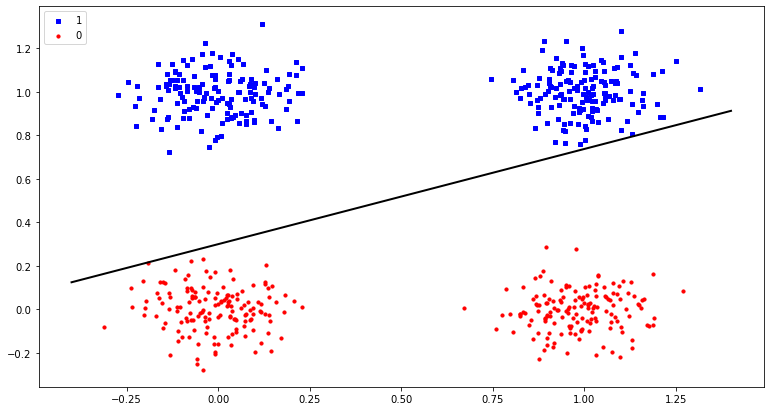

In [11]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1.4, -0.4],[x2_1, x2_2], color='black', linewidth=2)
plt.show()

### Configuração 2.
    Valor da taxa de aprendizado: 0.4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-1, +1).

In [12]:
theta = 0.0
n = 0.4
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### Execuções

In [13]:
adjusts_array = np.empty(executions_number, dtype=int)
epochs_array = np.empty(executions_number, dtype=int)

i = 1
while (i <= executions_number):
    print("")
    print("Iteração número ", i)
    print("")
    
    weights = perceptron.inittial_weights(-1.0, 1.0)
    perceptron.fit2(data0)
    adjusts_array[i - 1] = perceptron.getWeightsAdjusts()
    epochs_array[i - 1] = perceptron.getEpochs()
    print("Quantidade de ajustes: ", adjusts_array[i - 1])
    print("Quantidade de épocas: ", epochs_array[i - 1])
    
    #Garantir que na última interação teremos o vetor de pesos para posterior plotagem do gráfico
    if (i < 100):
        #Função que possibila reutilizar a classe sem precisar instaciar um novo objeto
        perceptron.reset()
    
    i+=1

config2_epochs_mean = np.round(np.mean(epochs_array), 4)
config2_epochs_sd = np.round(np.std(epochs_array), 4)
config2_adjusts_mean = np.round(np.mean(adjusts_array), 4)
config2_adjusts_sd = np.round(np.std(adjusts_array), 4)

print("")
print("Épocas. Média: ", config2_epochs_mean, " Desvio Padrão: ", config2_epochs_sd)
print("Ajustes. Média: ", config2_adjusts_mean, " Desvio Padrão: ", config2_adjusts_sd)


Iteração número  1

Quantidade de ajustes:  8
Quantidade de épocas:  5

Iteração número  2

Quantidade de ajustes:  10
Quantidade de épocas:  5

Iteração número  3

Quantidade de ajustes:  12
Quantidade de épocas:  5

Iteração número  4

Quantidade de ajustes:  7
Quantidade de épocas:  3

Iteração número  5

Quantidade de ajustes:  11
Quantidade de épocas:  4

Iteração número  6

Quantidade de ajustes:  6
Quantidade de épocas:  5

Iteração número  7

Quantidade de ajustes:  9
Quantidade de épocas:  5

Iteração número  8

Quantidade de ajustes:  7
Quantidade de épocas:  3

Iteração número  9

Quantidade de ajustes:  6
Quantidade de épocas:  3

Iteração número  10

Quantidade de ajustes:  10
Quantidade de épocas:  6

Iteração número  11

Quantidade de ajustes:  14
Quantidade de épocas:  6

Iteração número  12

Quantidade de ajustes:  4
Quantidade de épocas:  3

Iteração número  13

Quantidade de ajustes:  11
Quantidade de épocas:  4

Iteração número  14

Quantidade de ajustes:  5
Quanti

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [14]:
weights = perceptron.getWeights()
weights

array([ 0.5094, -0.0728,  1.2269])

#### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [15]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1.4:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1.4)

#para x1 igual a -0.4:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-0.4)

#### Gráfico do conjunto de dados e a reta que separa as classes

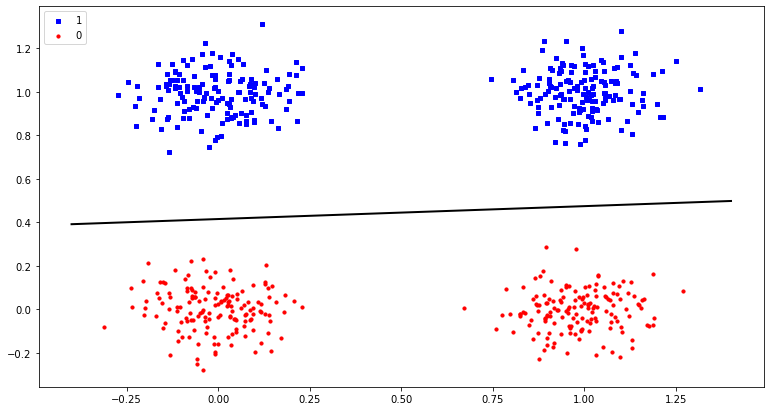

In [16]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1.4, -0.4],[x2_1, x2_2], color='black', linewidth=2)
plt.show()

### Configuração 3.
    Valor da taxa de aprendizado: 0.4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-0.5, +0.5).

In [17]:
theta = 0.0
n = 0.4
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### Execuções

In [18]:
adjusts_array = np.empty(executions_number, dtype=int)
epochs_array = np.empty(executions_number, dtype=int)

i = 1
while (i <= executions_number):
    print("")
    print("Iteração número ", i)
    print("")
    
    weights = perceptron.inittial_weights(-0.5, 0.5)
    perceptron.fit2(data0)
    adjusts_array[i - 1] = perceptron.getWeightsAdjusts()
    epochs_array[i - 1] = perceptron.getEpochs()
    print("Quantidade de ajustes: ", adjusts_array[i - 1])
    print("Quantidade de épocas: ", epochs_array[i - 1])
    
    #Garantir que na última interação teremos o vetor de pesos para posterior plotagem do gráfico
    if (i < 100):
        #Função que possibila reutilizar a classe sem precisar instaciar um novo objeto
        perceptron.reset()
    
    i+=1

config3_epochs_mean = np.round(np.mean(epochs_array), 4)
config3_epochs_sd = np.round(np.std(epochs_array), 4)
config3_adjusts_mean = np.round(np.mean(adjusts_array), 4)
config3_adjusts_sd = np.round(np.std(adjusts_array), 4)

print("")
print("Épocas. Média: ", config3_epochs_mean, " Desvio Padrão: ", config3_epochs_sd)
print("Ajustes. Média: ", config3_adjusts_mean, " Desvio Padrão: ", config3_adjusts_sd)


Iteração número  1

Quantidade de ajustes:  4
Quantidade de épocas:  3

Iteração número  2

Quantidade de ajustes:  10
Quantidade de épocas:  6

Iteração número  3

Quantidade de ajustes:  10
Quantidade de épocas:  4

Iteração número  4

Quantidade de ajustes:  8
Quantidade de épocas:  3

Iteração número  5

Quantidade de ajustes:  4
Quantidade de épocas:  3

Iteração número  6

Quantidade de ajustes:  12
Quantidade de épocas:  6

Iteração número  7

Quantidade de ajustes:  9
Quantidade de épocas:  4

Iteração número  8

Quantidade de ajustes:  0
Quantidade de épocas:  1

Iteração número  9

Quantidade de ajustes:  4
Quantidade de épocas:  3

Iteração número  10

Quantidade de ajustes:  6
Quantidade de épocas:  3

Iteração número  11

Quantidade de ajustes:  10
Quantidade de épocas:  5

Iteração número  12

Quantidade de ajustes:  2
Quantidade de épocas:  2

Iteração número  13

Quantidade de ajustes:  6
Quantidade de épocas:  3

Iteração número  14

Quantidade de ajustes:  4
Quantida

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [19]:
weights = perceptron.getWeights()
weights

array([ 0.3434, -0.1948,  0.9005])

#### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [20]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1.4:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1.4)

#para x1 igual a -0.4:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-0.4)

#### Gráfico do conjunto de dados e a reta que separa as classes

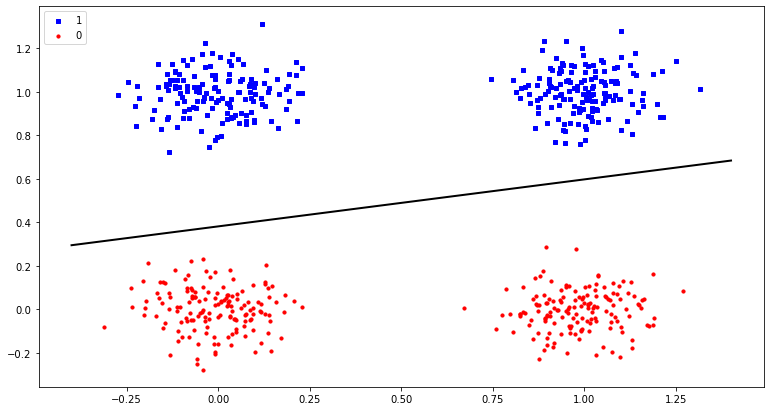

In [21]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1.4, -0.4],[x2_1, x2_2], color='black', linewidth=2)
plt.show()

### Configuração 4.
    Valor da taxa de aprendizado: 0.1
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-100, +100).

In [22]:
theta = 0.0
n = 0.1
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### Execuções

In [23]:
adjusts_array = np.empty(executions_number, dtype=int)
epochs_array = np.empty(executions_number, dtype=int)

i = 1
while (i <= executions_number):
    print("")
    print("Iteração número ", i)
    print("")
    
    weights = perceptron.inittial_weights(-100.0, 100.0)
    perceptron.fit2(data0)
    adjusts_array[i - 1] = perceptron.getWeightsAdjusts()
    epochs_array[i - 1] = perceptron.getEpochs()
    print("Quantidade de ajustes: ", adjusts_array[i - 1])
    print("Quantidade de épocas: ", epochs_array[i - 1])
    
    #Garantir que na última interação teremos o vetor de pesos para posterior plotagem do gráfico
    if (i < 100):
        #Função que possibila reutilizar a classe sem precisar instaciar um novo objeto
        perceptron.reset()
    
    i+=1

config4_epochs_mean = np.round(np.mean(epochs_array), 4)
config4_epochs_sd = np.round(np.std(epochs_array), 4)
config4_adjusts_mean = np.round(np.mean(adjusts_array), 4)
config4_adjusts_sd = np.round(np.std(adjusts_array), 4)

print("")
print("Épocas. Média: ", config4_epochs_mean, " Desvio Padrão: ", config4_epochs_sd)
print("Ajustes. Média: ", config4_adjusts_mean, " Desvio Padrão: ", config4_adjusts_sd)


Iteração número  1

Quantidade de ajustes:  1154
Quantidade de épocas:  56

Iteração número  2

Quantidade de ajustes:  1989
Quantidade de épocas:  21

Iteração número  3

Quantidade de ajustes:  1755
Quantidade de épocas:  21

Iteração número  4

Quantidade de ajustes:  692
Quantidade de épocas:  35

Iteração número  5

Quantidade de ajustes:  665
Quantidade de épocas:  29

Iteração número  6

Quantidade de ajustes:  547
Quantidade de épocas:  117

Iteração número  7

Quantidade de ajustes:  447
Quantidade de épocas:  5

Iteração número  8

Quantidade de ajustes:  551
Quantidade de épocas:  32

Iteração número  9

Quantidade de ajustes:  655
Quantidade de épocas:  40

Iteração número  10

Quantidade de ajustes:  1557
Quantidade de épocas:  43

Iteração número  11

Quantidade de ajustes:  1952
Quantidade de épocas:  29

Iteração número  12

Quantidade de ajustes:  1104
Quantidade de épocas:  9

Iteração número  13

Quantidade de ajustes:  1514
Quantidade de épocas:  130

Iteração núme

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [24]:
weights = perceptron.getWeights()
weights

array([15.009 ,  8.9256, 22.5812])

#### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [25]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1.4:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1.4)

#para x1 igual a -0.4:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-0.4)

#### Gráfico do conjunto de dados e a reta que separa as classes

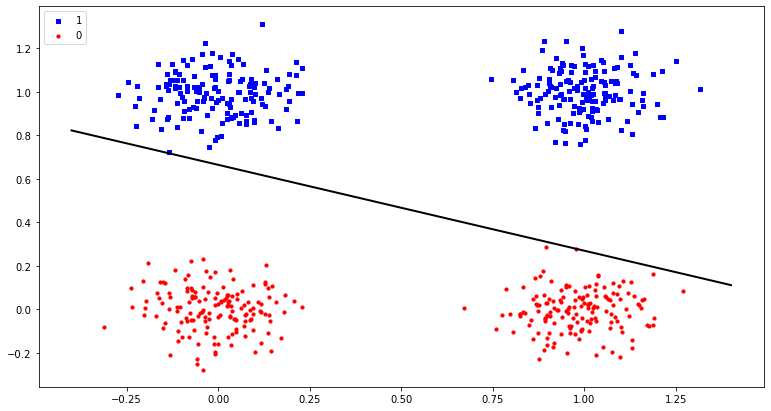

In [26]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1.4, -0.4],[x2_1, x2_2], color='black', linewidth=2)
plt.show()

### Configuração 5.
    Valor da taxa de aprendizado: 0.1
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-1, +1).

In [27]:
theta = 0.0
n = 0.1
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### Execuções

In [28]:
adjusts_array = np.empty(executions_number, dtype=int)
epochs_array = np.empty(executions_number, dtype=int)

i = 1
while (i <= executions_number):
    print("")
    print("Iteração número ", i)
    print("")
    
    weights = perceptron.inittial_weights(-1, 1)
    perceptron.fit2(data0)
    adjusts_array[i - 1] = perceptron.getWeightsAdjusts()
    epochs_array[i - 1] = perceptron.getEpochs()
    print("Quantidade de ajustes: ", adjusts_array[i - 1])
    print("Quantidade de épocas: ", epochs_array[i - 1])
    
    #Garantir que na última interação teremos o vetor de pesos para posterior plotagem do gráfico
    if (i < 100):
        #Função que possibila reutilizar a classe sem precisar instaciar um novo objeto
        perceptron.reset()
    
    i+=1

config5_epochs_mean = np.round(np.mean(epochs_array), 4)
config5_epochs_sd = np.round(np.std(epochs_array), 4)
config5_adjusts_mean = np.round(np.mean(adjusts_array), 4)
config5_adjusts_sd = np.round(np.std(adjusts_array), 4)

print("")
print("Épocas. Média: ", config5_epochs_mean, " Desvio Padrão: ", config5_epochs_sd)
print("Ajustes. Média: ", config5_adjusts_mean, " Desvio Padrão: ", config5_adjusts_sd)


Iteração número  1

Quantidade de ajustes:  9
Quantidade de épocas:  3

Iteração número  2

Quantidade de ajustes:  6
Quantidade de épocas:  2

Iteração número  3

Quantidade de ajustes:  3
Quantidade de épocas:  3

Iteração número  4

Quantidade de ajustes:  23
Quantidade de épocas:  6

Iteração número  5

Quantidade de ajustes:  9
Quantidade de épocas:  4

Iteração número  6

Quantidade de ajustes:  34
Quantidade de épocas:  5

Iteração número  7

Quantidade de ajustes:  31
Quantidade de épocas:  5

Iteração número  8

Quantidade de ajustes:  23
Quantidade de épocas:  6

Iteração número  9

Quantidade de ajustes:  10
Quantidade de épocas:  2

Iteração número  10

Quantidade de ajustes:  17
Quantidade de épocas:  4

Iteração número  11

Quantidade de ajustes:  17
Quantidade de épocas:  4

Iteração número  12

Quantidade de ajustes:  8
Quantidade de épocas:  4

Iteração número  13

Quantidade de ajustes:  12
Quantidade de épocas:  3

Iteração número  14

Quantidade de ajustes:  15
Qua

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [29]:
weights = perceptron.getWeights()
weights

array([0.1794, 0.0286, 0.4514])

#### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [30]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1.4:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1.4)

#para x1 igual a -0.4:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-0.4)

#### Gráfico do conjunto de dados e a reta que separa as classes

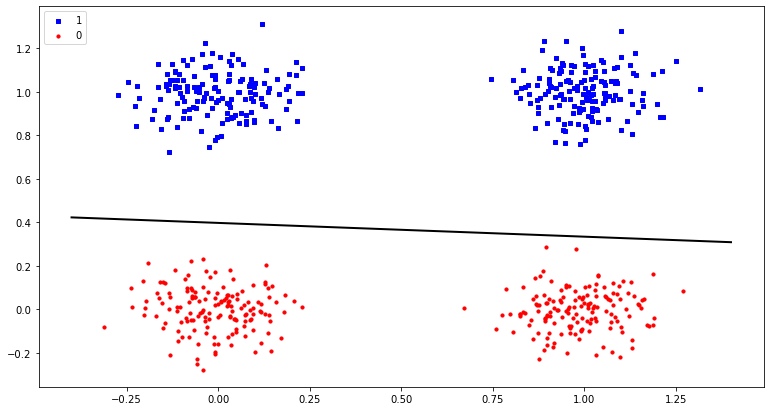

In [31]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1.4, -0.4],[x2_1, x2_2], color='black', linewidth=2)
plt.show()

### Configuração 6.
    Valor da taxa de aprendizado: 0.1
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-0.5, +0.5).

In [32]:
theta = 0.0
n = 0.1
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### Execuções

In [33]:
adjusts_array = np.empty(executions_number, dtype=int)
epochs_array = np.empty(executions_number, dtype=int)

i = 1
while (i <= executions_number):
    print("")
    print("Iteração número ", i)
    print("")
    
    weights = perceptron.inittial_weights(-0.5, 0.5)
    perceptron.fit2(data0)
    adjusts_array[i - 1] = perceptron.getWeightsAdjusts()
    epochs_array[i - 1] = perceptron.getEpochs()
    print("Quantidade de ajustes: ", adjusts_array[i - 1])
    print("Quantidade de épocas: ", epochs_array[i - 1])
    
    #Garantir que na última interação teremos o vetor de pesos para posterior plotagem do gráfico
    if (i < 100):
        #Função que possibila reutilizar a classe sem precisar instaciar um novo objeto
        perceptron.reset()
    
    i+=1

config6_epochs_mean = np.round(np.mean(epochs_array), 4)
config6_epochs_sd = np.round(np.std(epochs_array), 4)
config6_adjusts_mean = np.round(np.mean(adjusts_array), 4)
config6_adjusts_sd = np.round(np.std(adjusts_array), 4)

print("")
print("Épocas. Média: ", config6_epochs_mean, " Desvio Padrão: ", config6_epochs_sd)
print("Ajustes. Média: ", config6_adjusts_mean, " Desvio Padrão: ", config6_adjusts_sd)


Iteração número  1

Quantidade de ajustes:  8
Quantidade de épocas:  3

Iteração número  2

Quantidade de ajustes:  12
Quantidade de épocas:  4

Iteração número  3

Quantidade de ajustes:  10
Quantidade de épocas:  5

Iteração número  4

Quantidade de ajustes:  8
Quantidade de épocas:  4

Iteração número  5

Quantidade de ajustes:  20
Quantidade de épocas:  7

Iteração número  6

Quantidade de ajustes:  12
Quantidade de épocas:  4

Iteração número  7

Quantidade de ajustes:  5
Quantidade de épocas:  3

Iteração número  8

Quantidade de ajustes:  6
Quantidade de épocas:  4

Iteração número  9

Quantidade de ajustes:  9
Quantidade de épocas:  4

Iteração número  10

Quantidade de ajustes:  13
Quantidade de épocas:  4

Iteração número  11

Quantidade de ajustes:  7
Quantidade de épocas:  2

Iteração número  12

Quantidade de ajustes:  19
Quantidade de épocas:  6

Iteração número  13

Quantidade de ajustes:  9
Quantidade de épocas:  5

Iteração número  14

Quantidade de ajustes:  19
Quant

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [34]:
weights = perceptron.getWeights()
weights

array([ 0.1557, -0.0453,  0.3484])

#### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [35]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1.4:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1.4)

#para x1 igual a -0.4:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-0.4)

#### Gráfico do conjunto de dados e a reta que separa as classes

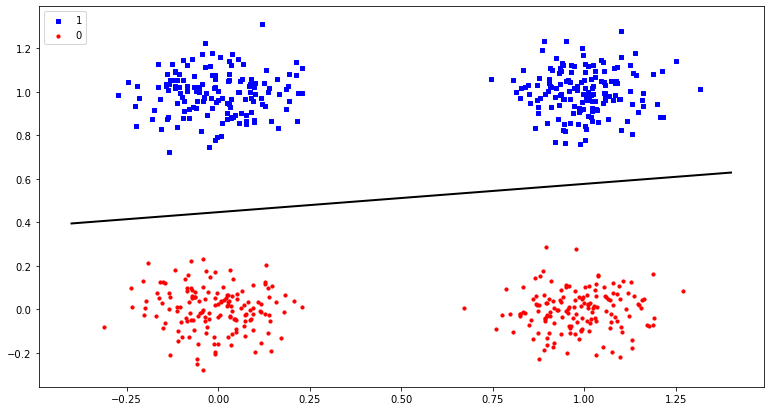

In [36]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1.4, -0.4],[x2_1, x2_2], color='black', linewidth=2)
plt.show()

### Configuração 7.
    Valor da taxa de aprendizado: 0.01
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-100, +100).

In [37]:
theta = 0.0
n = 0.01
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### Execuções

In [38]:
adjusts_array = np.empty(executions_number, dtype=int)
epochs_array = np.empty(executions_number, dtype=int)

i = 1
while (i <= executions_number):
    print("")
    print("Iteração número ", i)
    print("")
    
    weights = perceptron.inittial_weights(-100.0, 100.0)
    perceptron.fit2(data0)
    adjusts_array[i - 1] = perceptron.getWeightsAdjusts()
    epochs_array[i - 1] = perceptron.getEpochs()
    print("Quantidade de ajustes: ", adjusts_array[i - 1])
    print("Quantidade de épocas: ", epochs_array[i - 1])
    
    #Garantir que na última interação teremos o vetor de pesos para posterior plotagem do gráfico
    if (i < 100):
        #Função que possibila reutilizar a classe sem precisar instaciar um novo objeto
        perceptron.reset()
    
    i+=1

config7_epochs_mean = np.round(np.mean(epochs_array), 4)
config7_epochs_sd = np.round(np.std(epochs_array), 4)
config7_adjusts_mean = np.round(np.mean(adjusts_array), 4)
config7_adjusts_sd = np.round(np.std(adjusts_array), 4)

print("")
print("Épocas. Média: ", config7_epochs_mean, " Desvio Padrão: ", config7_epochs_sd)
print("Ajustes. Média: ", config7_adjusts_mean, " Desvio Padrão: ", config7_adjusts_sd)


Iteração número  1

Quantidade de ajustes:  7954
Quantidade de épocas:  646

Iteração número  2

Quantidade de ajustes:  15915
Quantidade de épocas:  41

Iteração número  3

Quantidade de ajustes:  13440
Quantidade de épocas:  723

Iteração número  4

Quantidade de ajustes:  10511
Quantidade de épocas:  273

Iteração número  5

Quantidade de ajustes:  10694
Quantidade de épocas:  629

Iteração número  6

Quantidade de ajustes:  431
Quantidade de épocas:  218

Iteração número  7

Quantidade de ajustes:  17919
Quantidade de épocas:  356

Iteração número  8

Quantidade de ajustes:  12686
Quantidade de épocas:  1100

Iteração número  9

Quantidade de ajustes:  6821
Quantidade de épocas:  54

Iteração número  10

Quantidade de ajustes:  13376
Quantidade de épocas:  901

Iteração número  11

Quantidade de ajustes:  29582
Quantidade de épocas:  117

Iteração número  12

Quantidade de ajustes:  23312
Quantidade de épocas:  60

Iteração número  13

Quantidade de ajustes:  26800
Quantidade de é

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [39]:
weights = perceptron.getWeights()
weights

array([13.7386,  8.2173, 20.5525])

#### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [40]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1.4:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1.4)

#para x1 igual a -0.4:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-0.4)

#### Gráfico do conjunto de dados e a reta que separa as classes

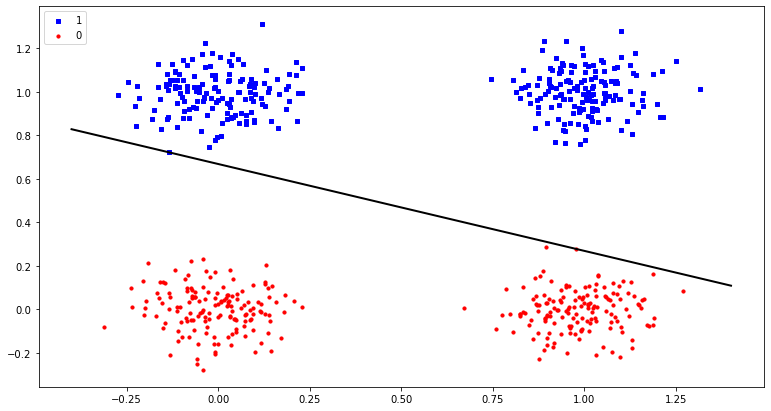

In [41]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1.4, -0.4],[x2_1, x2_2], color='black', linewidth=2)
plt.show()

### Configuração 8.
    Valor da taxa de aprendizado: 0.01
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-1, +1).

In [42]:
theta = 0.0
n = 0.01
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### Execuções

In [43]:
adjusts_array = np.empty(executions_number, dtype=int)
epochs_array = np.empty(executions_number, dtype=int)

i = 1
while (i <= executions_number):
    print("")
    print("Iteração número ", i)
    print("")
    
    weights = perceptron.inittial_weights(-1.0, 1.0)
    perceptron.fit2(data0)
    adjusts_array[i - 1] = perceptron.getWeightsAdjusts()
    epochs_array[i - 1] = perceptron.getEpochs()
    print("Quantidade de ajustes: ", adjusts_array[i - 1])
    print("Quantidade de épocas: ", epochs_array[i - 1])
    
    #Garantir que na última interação teremos o vetor de pesos para posterior plotagem do gráfico
    if (i < 100):
        #Função que possibila reutilizar a classe sem precisar instaciar um novo objeto
        perceptron.reset()
    
    i+=1

config8_epochs_mean = np.round(np.mean(epochs_array), 4)
config8_epochs_sd = np.round(np.std(epochs_array), 4)
config8_adjusts_mean = np.round(np.mean(adjusts_array), 4)
config8_adjusts_sd = np.round(np.std(adjusts_array), 4)

print("")
print("Épocas. Média: ", config8_epochs_mean, " Desvio Padrão: ", config8_epochs_sd)
print("Ajustes. Média: ", config8_adjusts_mean, " Desvio Padrão: ", config8_adjusts_sd)


Iteração número  1

Quantidade de ajustes:  45
Quantidade de épocas:  5

Iteração número  2

Quantidade de ajustes:  193
Quantidade de épocas:  6

Iteração número  3

Quantidade de ajustes:  24
Quantidade de épocas:  11

Iteração número  4

Quantidade de ajustes:  84
Quantidade de épocas:  14

Iteração número  5

Quantidade de ajustes:  95
Quantidade de épocas:  6

Iteração número  6

Quantidade de ajustes:  160
Quantidade de épocas:  6

Iteração número  7

Quantidade de ajustes:  75
Quantidade de épocas:  4

Iteração número  8

Quantidade de ajustes:  158
Quantidade de épocas:  12

Iteração número  9

Quantidade de ajustes:  131
Quantidade de épocas:  6

Iteração número  10

Quantidade de ajustes:  178
Quantidade de épocas:  5

Iteração número  11

Quantidade de ajustes:  126
Quantidade de épocas:  13

Iteração número  12

Quantidade de ajustes:  165
Quantidade de épocas:  7

Iteração número  13

Quantidade de ajustes:  200
Quantidade de épocas:  6

Iteração número  14

Quantidade de

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [44]:
weights = perceptron.getWeights()
weights

array([ 0.5589, -0.1166,  0.8989])

#### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [45]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1.4:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1.4)

#para x1 igual a -0.4:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-0.4)

#### Gráfico do conjunto de dados e a reta que separa as classes

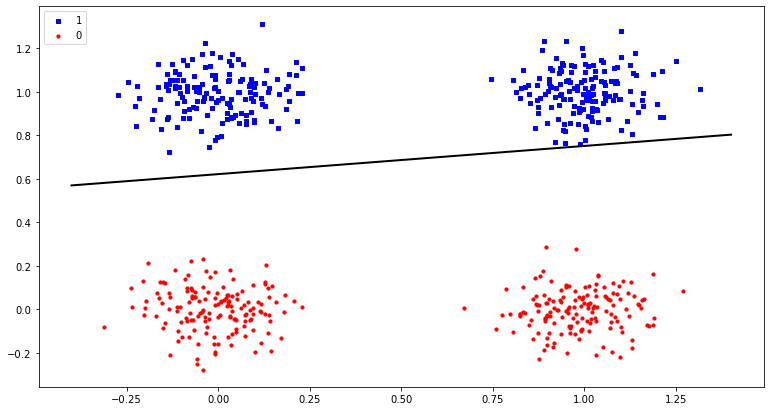

In [46]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1.4, -0.4],[x2_1, x2_2], color='black', linewidth=2)
plt.show()

### Configuração 9.
    Valor da taxa de aprendizado: 0.01
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-0.5, +0.5).

In [47]:
theta = 0.0
n = 0.01
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### Execuções

In [48]:
adjusts_array = np.empty(executions_number, dtype=int)
epochs_array = np.empty(executions_number, dtype=int)

i = 1
while (i <= executions_number):
    print("")
    print("Iteração número ", i)
    print("")
    
    weights = perceptron.inittial_weights(-0.5, 0.5)
    perceptron.fit2(data0)
    adjusts_array[i - 1] = perceptron.getWeightsAdjusts()
    epochs_array[i - 1] = perceptron.getEpochs()
    print("Quantidade de ajustes: ", adjusts_array[i - 1])
    print("Quantidade de épocas: ", epochs_array[i - 1])
    
    #Garantir que na última interação teremos o vetor de pesos para posterior plotagem do gráfico
    if (i < 100):
        #Função que possibila reutilizar a classe sem precisar instaciar um novo objeto
        perceptron.reset()
    
    i+=1

config9_epochs_mean = np.round(np.mean(epochs_array), 4)
config9_epochs_sd = np.round(np.std(epochs_array), 4)
config9_adjusts_mean = np.round(np.mean(adjusts_array), 4)
config9_adjusts_sd = np.round(np.std(adjusts_array), 4)

print("")
print("Épocas. Média: ", config9_epochs_mean, " Desvio Padrão: ", config9_epochs_sd)
print("Ajustes. Média: ", config9_adjusts_mean, " Desvio Padrão: ", config9_adjusts_sd)


Iteração número  1

Quantidade de ajustes:  12
Quantidade de épocas:  2

Iteração número  2

Quantidade de ajustes:  196
Quantidade de épocas:  7

Iteração número  3

Quantidade de ajustes:  42
Quantidade de épocas:  8

Iteração número  4

Quantidade de ajustes:  38
Quantidade de épocas:  6

Iteração número  5

Quantidade de ajustes:  79
Quantidade de épocas:  4

Iteração número  6

Quantidade de ajustes:  103
Quantidade de épocas:  7

Iteração número  7

Quantidade de ajustes:  115
Quantidade de épocas:  6

Iteração número  8

Quantidade de ajustes:  53
Quantidade de épocas:  4

Iteração número  9

Quantidade de ajustes:  97
Quantidade de épocas:  5

Iteração número  10

Quantidade de ajustes:  136
Quantidade de épocas:  6

Iteração número  11

Quantidade de ajustes:  103
Quantidade de épocas:  5

Iteração número  12

Quantidade de ajustes:  104
Quantidade de épocas:  5

Iteração número  13

Quantidade de ajustes:  64
Quantidade de épocas:  5

Iteração número  14

Quantidade de ajust

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [49]:
weights = perceptron.getWeights()
weights

array([0.3029, 0.1187, 0.4592])

#### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [50]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1.4:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1.4)

#para x1 igual a -0.4:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-0.4)

#### Gráfico do conjunto de dados e a reta que separa as classes

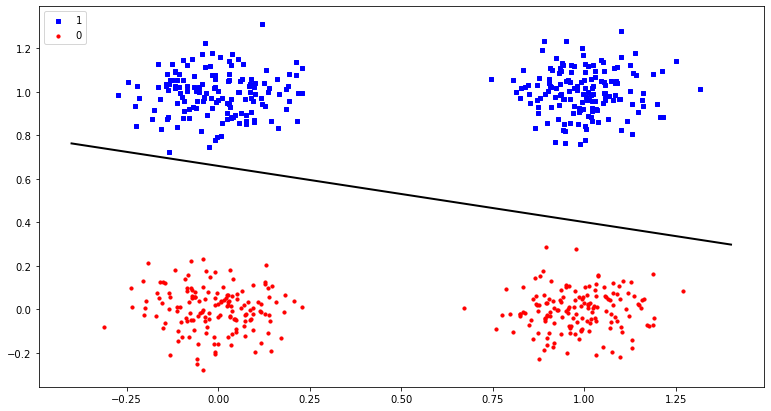

In [51]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1.4, -0.4],[x2_1, x2_2], color='black', linewidth=2)
plt.show()

In [52]:
#TODO Visualização dos resultados e discussão